# Gráficos e visualização

Vários pacotes disponíveis!

![pacotes-viz](https://optimise2.assets-servd.host/voracious-blesbok/production/Blog/PythonVisLandscape.jpg?w=1200&auto=compress%2Cformat&fit=crop&dm=1632326979&s=35cf543e04fd14bcc881ef8e70363860)


Da minha experiência, as que eu mais vejo sendo utilizadas são:
* matplotlib
* seaborn
* pandas
* bokeh
* plotly

__matplotlib__ é uma linguagem mais baixo-nível, baseada no conceito de __gramática dos gráficos__. É a mais poderosa e tanto seaborn quanto pandas são versões facilitadas de matplotlib. 

__seaborn__ é um pacote que agrupa vários comandos do matplotlib em funções. É uma abordagem mais _funcional_ para a construção de gráficos, menos calcada no conceito de gramática dos gráficos.

__pandas__ é um pacote que trata gráficos como uma extensão de um dataframe. Um dataframe pode ser representado igualmente por uma tabela ou por um gráfico.

__bokeh__ e __plotly__ permitem a construção de gráficos iterativos: o usuário pode dar zoom, selecionar uma região do gráfico, ou interagir com o gráfico de outras maneiras.

Para aplicações de Data Science & Machine Learning em Economia, conseguimos fazer tudo com __matplotlib__ e __seaborn__, mas __pandas__ é útil, porque é uma extensão de um pacote que já conhecemos.

## Antes de começar: Importar base de dados

In [1]:
#Dados 
import pandas as pd
from numpy import log10

url = "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/wdi_plotting.csv"
mundo = pd.read_csv(url)
mundo = mundo[mundo.Year == 2018]
mundo['logPop'] = log10(mundo['Population, total'])
mundo.sample(5)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)",logPop
10389,2018,Tajikistan,TJK,1071.104328,9100847.0,0.805420,NaN,NaN,70.879,34.8,NaN,6.959082
10410,2018,Vietnam,VNM,1964.361592,95545959.0,2.698806,NaN,NaN,75.317,20.4,98.353142,7.980212
10412,2018,West Bank and Gaza,PSE,2985.759092,4569087.0,NaN,NaN,NaN,73.895,19.9,99.382393,6.659829
10222,2018,Bolivia,BOL,2559.511644,11353140.0,2.000328,NaN,NaN,71.239,27.0,NaN,7.055116
10235,2018,Cayman Islands,CYM,78727.401590,64172.0,NaN,NaN,NaN,NaN,NaN,NaN,4.807346


## Pandas

Para plotar um gráfico no pandas, _tipicamente_, você deve preparar o seu dataframe para que ele seja plotado.
* O eixo X do seu gráfico deve ser o índice do seu dataframe
* Cada coluna será uma variável. Ou seja, o seu dataframe não deve ter nada que você não deseje plotar.


### Gráfico de barras

In [2]:
#Mortalidade infantil e Alfabetização de Meninas por país
df = mundo.set_index('Country Name')
df = df.sort_values('Population, total', ascending=False)
df = df.head(10)
df = df[["Country Code",
         "Mortality rate, under-5 (per 1,000 live births)", 
         "Literacy rate, youth female (% of females ages 15-24)"]]

df

,Country Code,"Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
Country Name,,,
China,CHN,8.5,99.783379
India,IND,36.3,90.169411
United States,USA,6.6,NaN
Indonesia,IDN,24.8,99.696251
Pakistan,PAK,69.4,NaN
Brazil,BRA,14.4,99.431534
Nigeria,NGA,120.0,68.262627
Bangladesh,BGD,32.3,94.912590
Russian Federation,RUS,6.3,99.749092


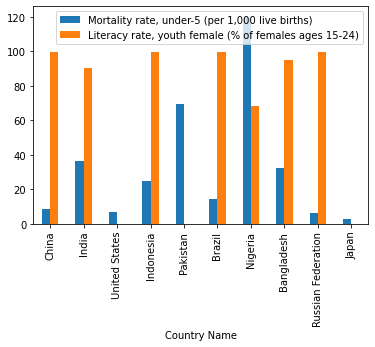

In [3]:
df.plot(kind='bar');

Podemos fazer esse gráfico mais bonitinho:

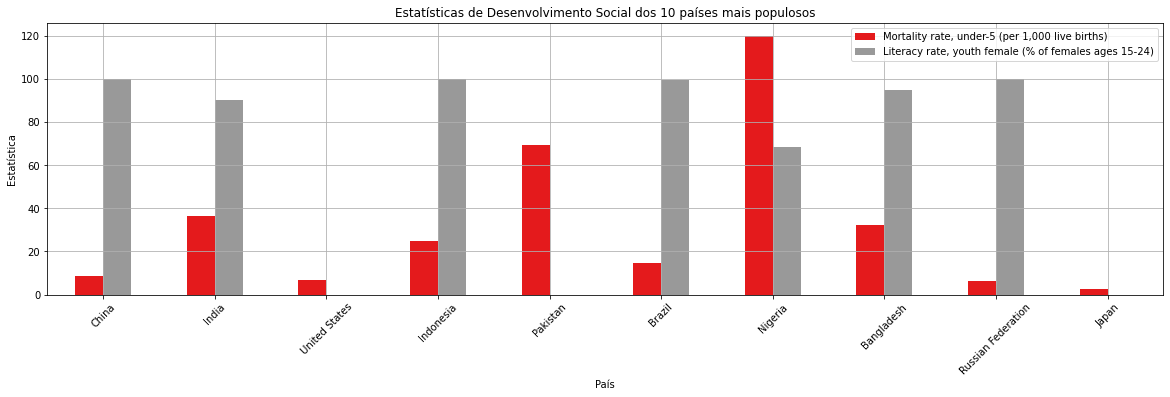

In [4]:
df.plot(kind='bar', 
        figsize=(20,5), 
        rot=45,
        title="Estatísticas de Desenvolvimento Social dos 10 países mais populosos",
        xlabel="País",
        ylabel="Estatística",
        grid=True,
       cmap='Set1');

Outros tipos de gráfico:

In [5]:
#Mortalidade infantil e Alfabetização de Meninas por país
df = mundo.set_index('Country Name')
df = df.sort_values('Population, total', ascending=False)
df = df[["Country Code",
         "Mortality rate, under-5 (per 1,000 live births)", 
         "Literacy rate, youth female (% of females ages 15-24)"]]

### Histogramas

<AxesSubplot:ylabel='Frequency'>

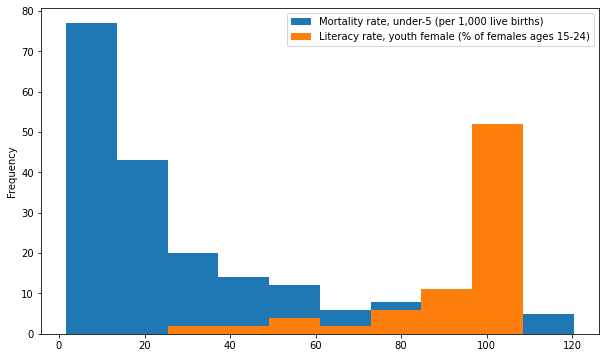

In [6]:
df.plot(kind='hist', figsize=(10,6))

### Densidade

<AxesSubplot:ylabel='Density'>

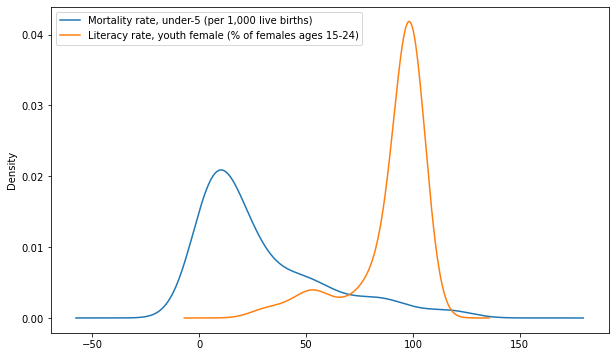

In [7]:
df.plot(kind='kde', figsize=(10,6))

### Diagama de Dispersão (_scatter plot_)

Para fazer um gráfico de dispersão, podemos passar x e y diretamente:

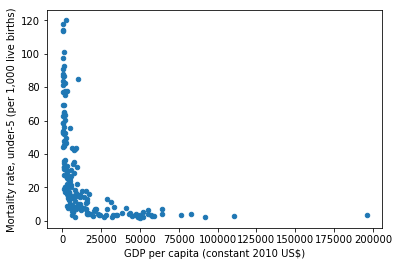

In [8]:
mundo.plot(x="GDP per capita (constant 2010 US$)",
           y="Mortality rate, under-5 (per 1,000 live births)", 
           kind='scatter');

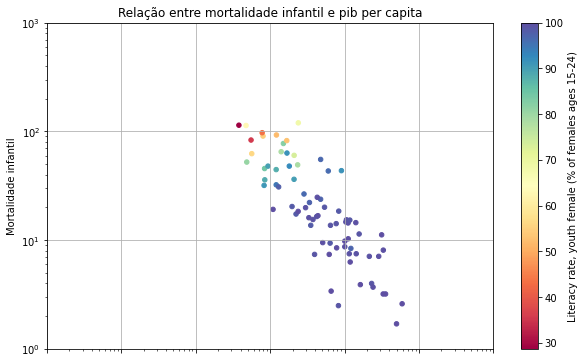

In [9]:
mundo.plot(x = "GDP per capita (constant 2010 US$)",
           y = "Mortality rate, under-5 (per 1,000 live births)",
           c = "Literacy rate, youth female (% of females ages 15-24)",
           cmap = "Spectral",
           kind = 'scatter', 
           figsize = (10,6), 
           xlim=(1,1e6),
           ylim=(1,1e3),
           title = 'Relação entre mortalidade infantil e pib per capita',
           xlabel = 'PIB per capita',
           ylabel = 'Mortalidade infantil',
           grid=True,
           loglog=True
          );

In [10]:
pd.options.plotting.backend = 'plotly'

In [11]:
mundo.plot(x = "GDP per capita (constant 2010 US$)",
           y = "Mortality rate, under-5 (per 1,000 live births)",
          );

## Seaborn

Seaborn é um pacote para visuaização estatística.  

In [12]:
import seaborn as sns

In [13]:
mundo.head(1)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)",logPop
10199,2018,Afghanistan,AFG,564.61704,37171922.0,0.200151,NaN,NaN,64.486,62.5,56.254749,7.570215


In [14]:
df = mundo[['GDP per capita (constant 2010 US$)',
            'logPop',
            'CO2 emissions (metric tons per capita)',
            'Life expectancy at birth, total (years)',
            'Mortality rate, under-5 (per 1,000 live births)',
            'Literacy rate, youth female (% of females ages 15-24)']]
df.corr()

,GDP per capita (constant 2010 US$),logPop,CO2 emissions (metric tons per capita),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
GDP per capita (constant 2010 US$),1.000000,-0.225156,0.605110,0.653857,-0.442952,0.361190
logPop,-0.225156,1.000000,-0.050099,-0.152969,0.134208,-0.142239
CO2 emissions (metric tons per capita),0.605110,-0.050099,1.000000,0.520904,-0.495343,0.373931
"Life expectancy at birth, total (years)",0.653857,-0.152969,0.520904,1.000000,-0.922308,0.772955
"Mortality rate, under-5 (per 1,000 live births)",-0.442952,0.134208,-0.495343,-0.922308,1.000000,-0.888661
"Literacy rate, youth female (% of females ages 15-24)",0.361190,-0.142239,0.373931,0.772955,-0.888661,1.000000


### Heatmap

<AxesSubplot:>

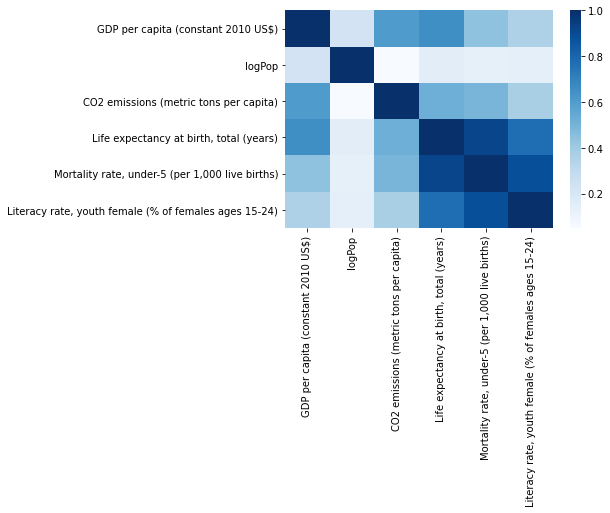

In [15]:
sns.heatmap(df.corr().abs(), cmap='Blues')

### Clustermap

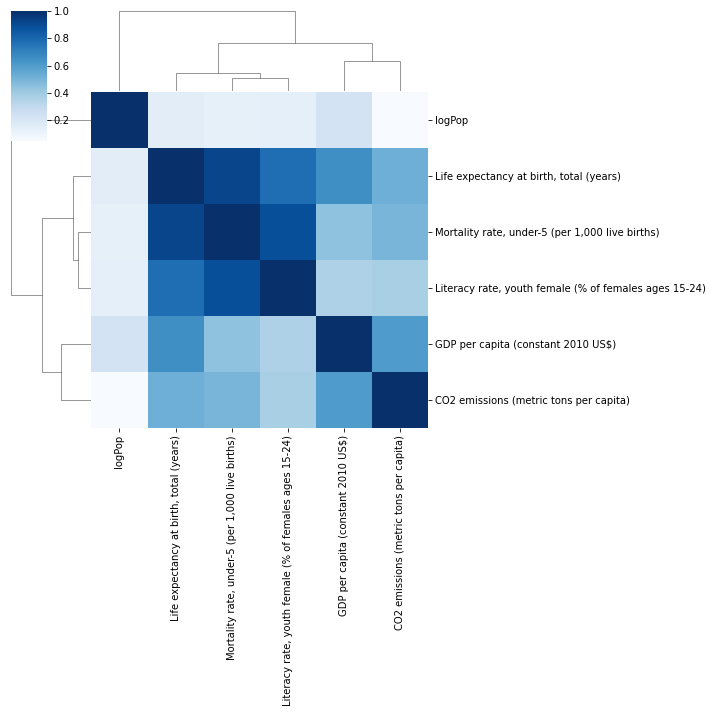

In [16]:
sns.clustermap(df.corr().abs(), cmap='Blues')

### Densidade

<AxesSubplot:xlabel='Life expectancy at birth, total (years)'>

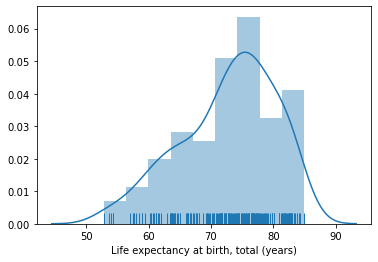

In [17]:
sns.distplot(mundo["Life expectancy at birth, total (years)"], hist=True, rug=True)

### Densidades marginais e conjunta

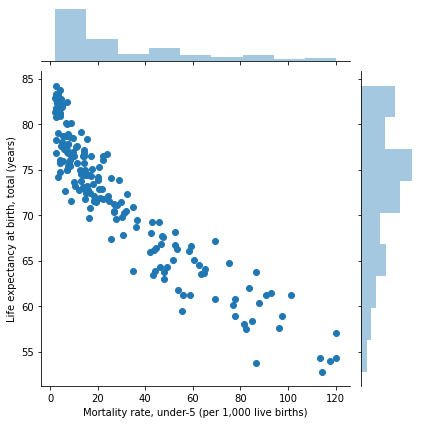

In [18]:
sns.jointplot(x='Mortality rate, under-5 (per 1,000 live births)', y='Life expectancy at birth, total (years)', data=mundo)

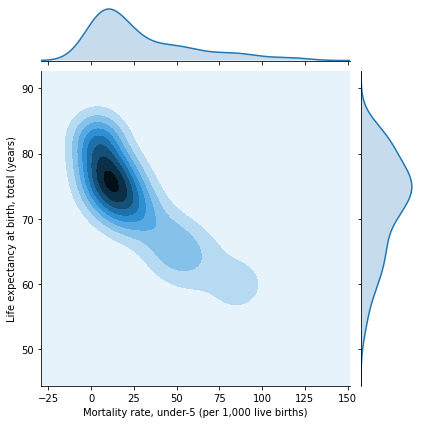

In [19]:
sns.jointplot(x='Mortality rate, under-5 (per 1,000 live births)', y='Life expectancy at birth, total (years)', data=mundo, kind='kdeplot')

### Regressão Linear, LOWESS e Logística

<AxesSubplot:xlabel='Mortality rate, under-5 (per 1,000 live births)', ylabel='Life expectancy at birth, total (years)'>

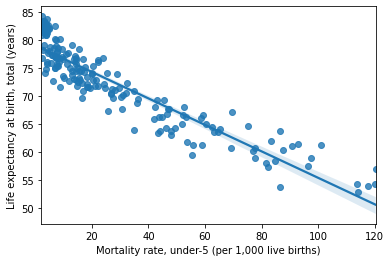

In [20]:
#Regressão Linear
sns.regplot(x='Mortality rate, under-5 (per 1,000 live births)', y='Life expectancy at birth, total (years)', data=mundo)

<AxesSubplot:xlabel='Mortality rate, under-5 (per 1,000 live births)', ylabel='Life expectancy at birth, total (years)'>

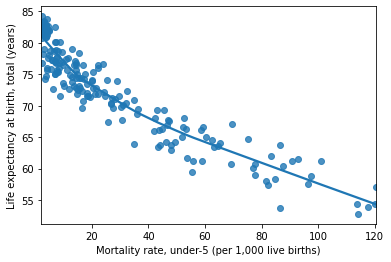

In [21]:
#LOWESS
sns.regplot(x='Mortality rate, under-5 (per 1,000 live births)', y='Life expectancy at birth, total (years)', data=mundo, lowess=True)

In [22]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='fare', ylabel='survived'>

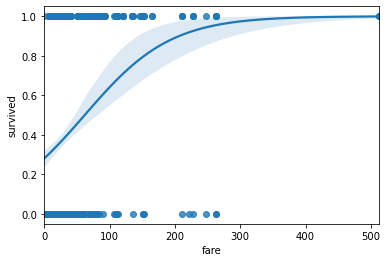

In [23]:
#Logistic
sns.regplot(x='fare', y='survived', data=titanic, logistic=True)

### Boxplot e violin pot

<AxesSubplot:xlabel='sex', ylabel='age'>

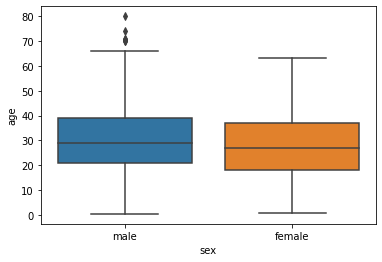

In [24]:
sns.boxplot('sex','age', data=titanic)

<AxesSubplot:xlabel='sex', ylabel='age'>

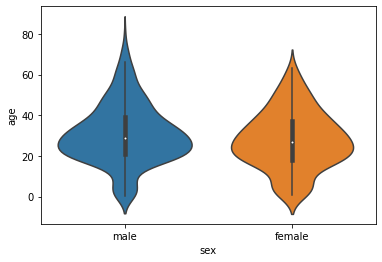

In [25]:
sns.violinplot('sex','age', data=titanic)

## Matplotlib

* Gramática de Gráficos
* Uma espada Jedi: muito poderosa, mas tem que saber usar e dá trabalho aprender.

In [26]:
import matplotlib.pyplot as plt

### Diagrama de Dispersão

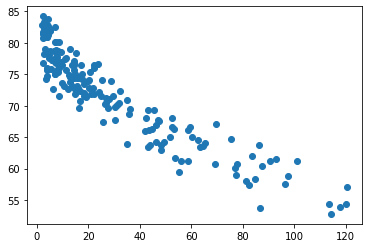

In [27]:
plt.scatter(mundo['Mortality rate, under-5 (per 1,000 live births)'], 
            mundo['Life expectancy at birth, total (years)'])
plt.show()

### Gráfico com vários elementos

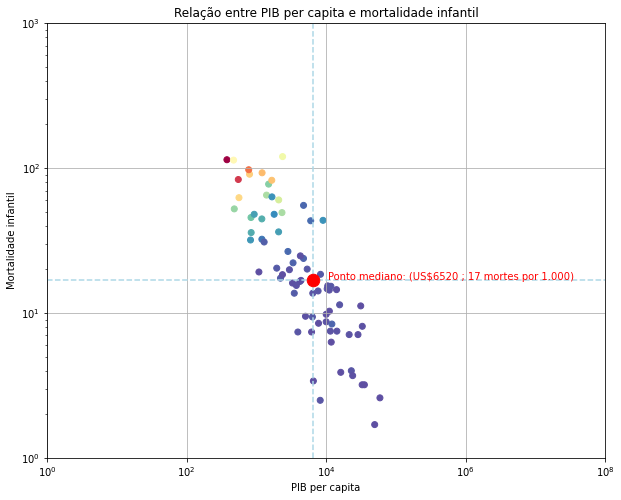

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(mundo["GDP per capita (constant 2010 US$)"], 
            mundo["Mortality rate, under-5 (per 1,000 live births)"],
            c = mundo["Literacy rate, youth female (% of females ages 15-24)"],
            cmap = "Spectral");
plt.xlabel('PIB per capita')
plt.ylabel('Mortalidade infantil')
plt.title('Relação entre PIB per capita e mortalidade infantil')

xm = mundo["GDP per capita (constant 2010 US$)"].median()
ym = mundo["Mortality rate, under-5 (per 1,000 live births)"].median()

plt.axvline(xm, c='lightblue', ls='dashed')
plt.axhline(ym, c='lightblue', ls='dashed')
plt.plot(xm,ym, c='red', marker='.', markersize=25)
plt.annotate(f'Ponto mediano: (US${xm:.0f} ; {ym:.0f} mortes por 1.000)', (xm + 4000, ym), c='red')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1e8)
plt.ylim(1,1e3)
plt.grid('on')
plt.show()

### Subplots

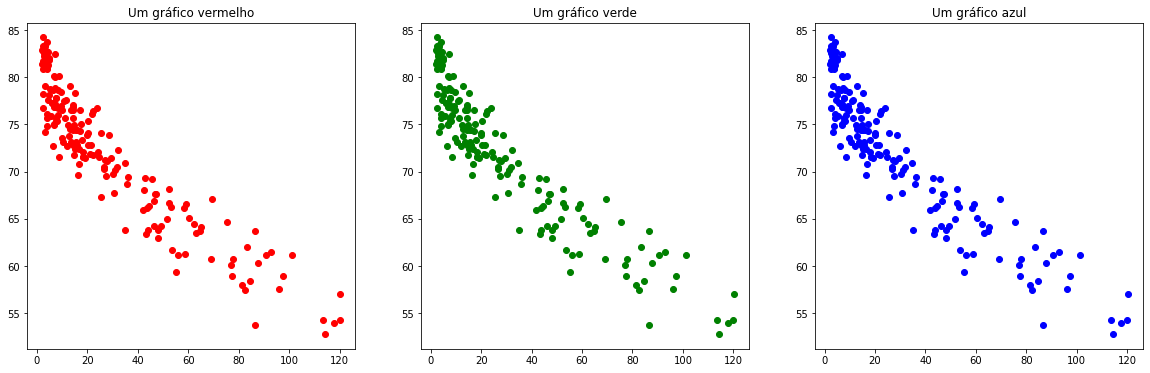

In [29]:
plt.figure(figsize=(20,6))

#plot 1:
plt.subplot(1, 3, 1)
plt.scatter(mundo['Mortality rate, under-5 (per 1,000 live births)'], 
            mundo['Life expectancy at birth, total (years)'], 
            c='Red')
plt.title("Um gráfico vermelho")

#plot 2:
plt.subplot(1, 3, 2)
plt.scatter(mundo['Mortality rate, under-5 (per 1,000 live births)'], 
            mundo['Life expectancy at birth, total (years)'], 
            c='Green')
plt.title("Um gráfico verde")

#plot 2:
plt.subplot(1, 3, 3)
plt.scatter(mundo['Mortality rate, under-5 (per 1,000 live births)'], 
            mundo['Life expectancy at birth, total (years)'], 
            c='Blue')
plt.title("Um gráfico azul")


plt.show()